In [ ]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


1. Data Extraction

    **Objective:** Load the data from the Azure Data Lake into a DataFrame

In [ ]:
%pip install azure-storage-blob

from azure.storage.blob import BlobServiceClient
import pandas as pd
from io import StringIO

# Define the connection string and blob details
connection_string = ""

container_name = ""
blob_name = ""

# Create a BlobServiceClient
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

# Get the blob client
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Download the blob content as a string
blob_data = blob_client.download_blob().content_as_text()

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [ ]:
# Read the CSV data into a DataFrame
df_students = pd.read_csv(StringIO(blob_data))

# Display the first few rows of the DataFrame
display(df_students.head())

Student_Name,Student_Age,Student_Year,Father_Degree,Mother_Degree,Education_Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
Allison Lang,18,Year 9,High School,High School,IB,72.23673953300614,85.93114936966514,65.69851271532883,84.1638444286312,78.17941373663007,50.57820887095305,70.071681039,80.29450850418387,72.70974127694512,59.08067817625046
Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.60307770488868,73.18642672130893,64.24023932483671,47.78654246153686,83.13858065509869,66.91370171778615,42.58721142600236,87.99700880410457,89.17686207511792,78.49315791112478
Melissa Lee,16,Year 10,None,PhD,IB,100.0,83.98592336280845,89.37816212685267,82.44685282,86.36881781399998,90.34702011670538,100.0,83.97229648622279,69.21296090882828,79.20663405797652
Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.08213123885534,100.0,78.80221976608895,78.447670476,64.60623876381095,82.04542086155328,69.86909904215277,91.12287029269561,95.20775195312397,52.60270573904484
Eric Steele,17,Year 11,PhD,None,IGCSE,74.90614373713879,69.51814562964812,65.28484123859717,56.31702841468093,69.75814006591311,85.810640538,63.77695507052932,61.80259881797415,84.95113157922286,68.14646714371376


2. Data Exploration

    **Objective:** Analyze the dataset and visualize key aspects to identify data quality issues.

Summary Statistics:
         Student_Age     Subject_1  ...     Subject_9    Subject_10
count  50060.000000  50060.000000  ...  50060.000000  50060.000000
mean      16.003915     74.732046  ...     74.708324     74.686701
std        1.415874     14.341515  ...     14.357485     14.363807
min       14.000000     20.000000  ...     20.000000     20.000000
25%       15.000000     64.921340  ...     64.976347     64.844595
50%       16.000000     75.047923  ...     75.031301     74.984296
75%       17.000000     85.144389  ...     85.153220     85.082598
max       18.000000    100.000000  ...    100.000000    100.000000

[8 rows x 11 columns]
Missing Values:
 Student_Name      0
Student_Age       0
Student_Year      0
Father_Degree     0
Mother_Degree     0
Education_Type    0
Subject_1         0
Subject_2         0
Subject_3         0
Subject_4         0
Subject_5         0
Subject_6         0
Subject_7         0
Subject_8         0
Subject_9         0
Subject_10        0
dtype: int64


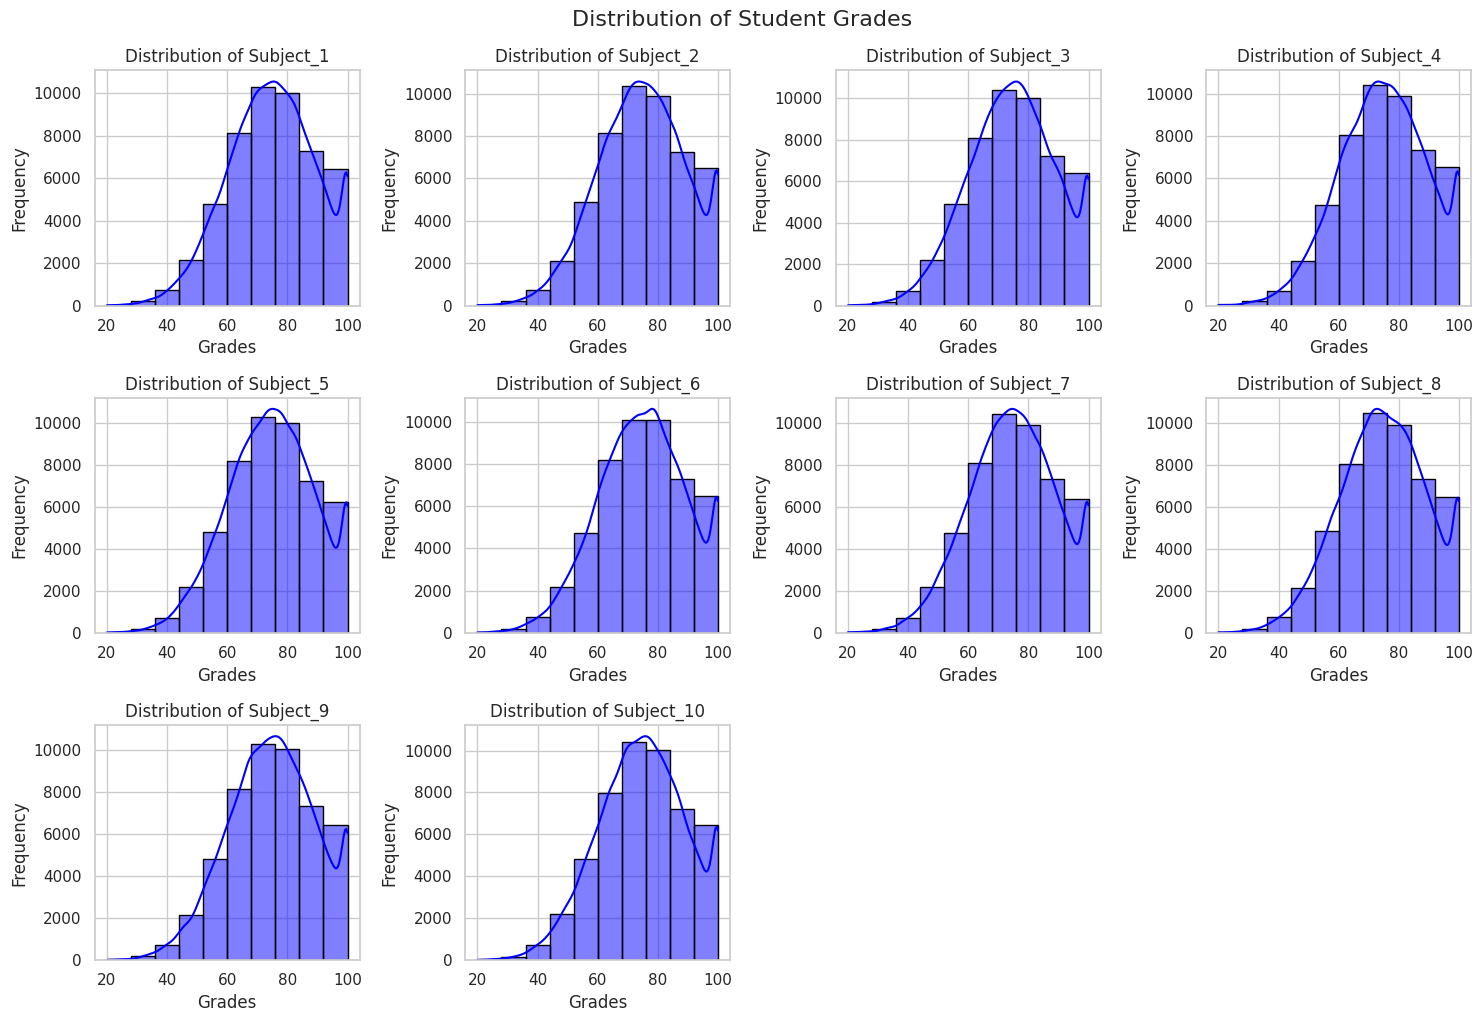

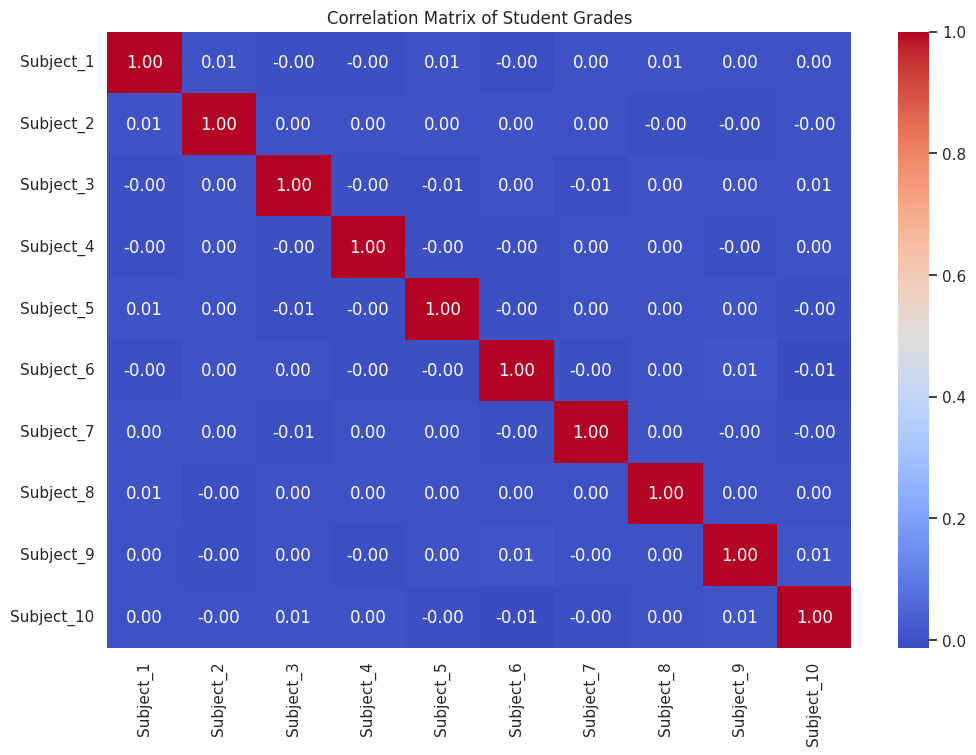

Unique Value Insights:
Student_Year: ['Year 9              ' 'Year 10             ' 'Year 11             '
 'Year 12             ']
Father_Degree: ['High School         ' 'Bachelor            ' 'None                '
 'PhD                 ' 'Master              ']
Mother_Degree: ['High School         ' 'PhD                 ' 'Bachelor            '
 'None                ' 'Master              ']
Education_Type: ['IB                  ' 'Thanweya            ' 'IGCSE               ']


In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style for plots
sns.set(style="whitegrid")

# Summary statistics
summary_stats = df_students.describe()
print("Summary Statistics:\n", summary_stats)

# Check for missing values
missing_values = df_students.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize distributions of grades
grade_columns = [f'Subject_{i}' for i in range(1, 11)]

plt.figure(figsize=(15, 10))
for i, column in enumerate(grade_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_students[column], bins=10, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Grades')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Student Grades', fontsize=16, y=1.02)
plt.show()

# Visualize correlation between subjects
plt.figure(figsize=(12, 8))
correlation_matrix = df_students[grade_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Student Grades')
plt.show()


# what are the Unique Values of (student year, father degree, mother degree, education type)
# Extract Unique Values
unique_values = {
    "Student_Year": df_students['Student_Year'].unique(),
    "Father_Degree": df_students['Father_Degree'].unique(),
    "Mother_Degree": df_students['Mother_Degree'].unique(),
    "Education_Type": df_students['Education_Type'].unique(),
}

# Print Unique Values
print("Unique Value Insights:")
for key, values in unique_values.items():
    print(f"{key}: {values}")


# Data Exploration Phase

## Summary Statistics

The summary statistics provide an overview of the numeric features in the dataset. Below are the key statistics for `Student_Age` and grades for `Subject_1` to `Subject_10`:

| Statistic       | Student_Age  | Subject_1   | ... | Subject_9   | Subject_10  |
|------------------|--------------|--------------|-----|--------------|--------------|
| Count            | 50,060       | 50,060       | ... | 50,060       | 50,060       |
| Mean             | 16.00        | 74.73        | ... | 74.71        | 74.69        |
| Standard Deviation| 1.42        | 14.34        | ... | 14.36        | 14.36        |
| Minimum          | 14           | 20           | ... | 20           | 20           |
| 25th Percentile  | 15           | 64.92        | ... | 64.98        | 64.84        |
| Median           | 16           | 75.05        | ... | 75.03        | 74.98        |
| 75th Percentile  | 17           | 85.14        | ... | 85.15        | 85.08        |
| Maximum          | 18           | 100          | ... | 100          | 100          |

The statistics suggest that:
- The average student age is approximately 16 years.
- Grades across all subjects range from 20 to 100, with a mean of around 74-75.

## Missing Values

The analysis shows that there are no missing values in the dataset for any of the columns. Below is a summary of missing values for each attribute:

| Attribute        | Missing Values |
|------------------|----------------|
| Student_Name     | 0              |
| Student_Age      | 0              |
| Student_Year     | 0              |
| Father_Degree    | 0              |
| Mother_Degree    | 0              |
| Education_Type   | 0              |
| Subject_1        | 0              |
| Subject_2        | 0              |
| Subject_3        | 0              |
| Subject_4        | 0              |
| Subject_5        | 0              |
| Subject_6        | 0              |
| Subject_7        | 0              |
| Subject_8        | 0              |
| Subject_9        | 0              |
| Subject_10       | 0              |

### Insights
- The absence of missing values indicates a clean dataset regarding the collected attributes.
- All students have data for age, grades, and parental education, which will aid in further analysis.
- Unique values of the Father_Degree is High School, Bachelor, None, PhD, Master
- Unique values of the Mother_Degree is  High School, Bachelor, None, PhD, Master
- Unique values of the Education_Type is IB, Thanweya, IGCSE


In [ ]:
# Check for duplicates in the DataFrame
duplicate_count = df_students.duplicated().sum()
duplicates = df_students[df_students.duplicated()]

# Display duplicate count and any duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("Duplicate Rows:")
    display(duplicates)
else:
    print("No duplicates found.")

Number of duplicate rows: 60
Duplicate Rows:


Student_Name,Student_Age,Student_Year,Father_Degree,Mother_Degree,Education_Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
Allison Lang,18,Year 9,High School,High School,IB,72.23673953300614,85.93114936966514,65.69851271532883,84.1638444286312,78.17941373663007,50.57820887095305,70.071681039,80.29450850418387,72.70974127694512,59.08067817625046
Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.60307770488868,73.18642672130893,64.24023932483671,47.78654246153686,83.13858065509869,66.91370171778615,42.58721142600236,87.99700880410457,89.17686207511792,78.49315791112478
Melissa Lee,16,Year 10,None,PhD,IB,100.0,83.98592336280845,89.37816212685267,82.44685282,86.36881781399998,90.34702011670538,100.0,83.97229648622279,69.21296090882828,79.20663405797652
Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.08213123885534,100.0,78.80221976608895,78.447670476,64.60623876381095,82.04542086155328,69.86909904215277,91.12287029269561,95.20775195312397,52.60270573904484
Eric Steele,17,Year 11,PhD,None,IGCSE,74.90614373713879,69.51814562964812,65.28484123859717,56.31702841468093,69.75814006591311,85.810640538,63.77695507052932,61.80259881797415,84.95113157922286,68.14646714371376
Gabriel Brown,15,Year 11,Bachelor,Master,IB,72.52941756567286,84.63012678528686,88.03681272553553,83.41956545808367,95.99475919148017,81.41609333837171,78.75879528636749,46.53522738538755,77.55388682762485,59.4073959342704
Carolyn Erickson,18,Year 10,Bachelor,High School,IGCSE,83.73317015841104,53.49068149370072,64.17683213460955,74.78808222399998,64.96112953388428,69.59421204498645,80.82629496228866,72.33725697088289,88.71676789590974,93.3955624731564
Anna Mooney,14,Year 12,Master,PhD,Thanweya,61.32451501811476,65.69472744310949,56.516955225193136,76.30063643803929,78.02510339768803,71.51054544829633,64.87042766441473,45.91552027132794,42.06997212345946,69.81213150251212
Aaron Mullen,15,Year 11,PhD,PhD,Thanweya,69.81996739734151,36.82859445886031,76.87353534307675,49.365484182,67.70895743377115,61.40984749093659,74.60237362469329,75.59767729994994,85.59456445775916,80.01601676914022
Carrie Harvey,17,Year 9,PhD,None,IGCSE,52.06411990552364,75.20175398412893,80.70579035264221,67.39014418390616,78.04519106454602,69.355050188,82.10307968923705,71.72488438060147,70.87384377877402,61.598955911


It looks like there are **60 duplicate rows** in your dataset.

**Given that you are working with historical data and focusing on analysis and reporting, the best approach to handle the 60 duplicate records will depend on the context of the data and the importance of each record. Here are the recommended approaches based on common scenarios:**

**Recommended Approach is to Remove Exact Duplicates**

Remove Exact Duplicates:
 If the duplicates are exact copies of each other and do not contain any unique information, the most straightforward approach is to remove them. This will simplify your dataset and ensure that your analysis is based on unique records.

Why This Approach?

- Simplicity: It reduces the dataset size without losing valuable information.
- Clarity: It ensures that each record represents a unique entry, making analysis and reporting clearer.
- Efficiency: It improves performance when processing the dataset for analysis.


In [ ]:
# Identify duplicates
duplicates = df_students[df_students.duplicated(keep=False)]  # keep=False to mark all duplicates

# Check if duplicates have any differences in specific columns
# Assuming you want to check all columns for differences
duplicate_groups = duplicates.groupby(duplicates.columns.tolist()).size().reset_index(name='counts')

# Filter groups that have more than one occurrence (indicating duplicates)
exact_duplicates = duplicate_groups[duplicate_groups['counts'] > 1]

# Display the exact duplicates
print("Exact Duplicates:")
print(exact_duplicates)

# Check for any differences in the original dataset
if exact_duplicates.empty:
    print("All duplicates are exact.")
else:
    print("Some duplicates contain different values in certain columns.")

Exact Duplicates:
            Student_Name  Student_Age  ... Subject_10 counts
0   Aaron Mullen                   15  ...  80.016017      3
1   Allison Lang                   18  ...  59.080678      3
2   Amy Robles                     15  ...  73.931060      3
3   Amy Schneider                  18  ...  72.006942      3
4   Andrea Hill                    15  ...  82.163688      3
5   Anna Mooney                    14  ...  69.812132      3
6   Ashley Rogers                  17  ...  94.834315      3
7   Barbara Carlson                17  ...  69.204245      3
8   Cameron Fox                    15  ...  54.900633      3
9   Carol Jenkins                  18  ...  80.971446      3
10  Carolyn Erickson               18  ...  93.395562      3
11  Carrie Harvey                  17  ...  61.598956      3
12  Eric Steele                    17  ...  68.146467      3
13  Erica Moore                    18  ...  64.734519      3
14  Gabriel Brown                  15  ...  59.407396      3
15  Ja

Based on the output, it appears that we have identified **30 unique records** that are exact duplicates, each appearing **3 times** in the dataset. However, the message "Some duplicates contain different values in certain columns" indicates that there are other records in your dataset that are not exact duplicates, meaning they may have variations in some columns.

### Next Steps to Handle Duplicates

1. **Identify Non-Exact Duplicates**: 
   - Determine which records are not exact duplicates and identify the columns where they differ.

2. **Review Differences**: 
   - Analyze the differences in the columns of interest to decide how to handle them.

3. **Decide on a Strategy**: 
   - Based on the analysis, choose a strategy for handling these duplicates. Here are some options:
     - **Remove Exact Duplicates**: If the duplicates are exact copies, you can remove them.
     - **Aggregate Data**: If there are differences in certain columns, consider aggregating the data (e.g., averaging scores).
     - **Keep One Version**: If the differences are minor or not significant, you might choose to keep one version of the record.

In [ ]:

### Implementation Steps

#### 1. Identify Non-Exact Duplicates

# Identify non-exact duplicates
non_exact_duplicates = df_students[df_students.duplicated(keep=False) & ~df_students.duplicated(keep='first')]

# # Display non-exact duplicates
# print("Non-Exact Duplicates:")
# print(non_exact_duplicates)

# Group by the columns that define a duplicate (e.g., Student_Name, Student_Age)
non_exact_groups = non_exact_duplicates.groupby(['Student_Name', 'Student_Age']).agg(lambda x: x.unique().tolist())

# Display the differences
print("Differences in Non-Exact Duplicates:")
print(non_exact_groups)




Differences in Non-Exact Duplicates:
                                            Student_Year  ...            Subject_10
Student_Name         Student_Age                          ...                      
Aaron Mullen         15           [Year 11             ]  ...   [80.01601676914022]
Allison Lang         18           [Year 9              ]  ...   [59.08067817625046]
Amy Robles           15           [Year 9              ]  ...   [73.93105958068845]
Amy Schneider        18           [Year 9              ]  ...        [72.006942231]
Andrea Hill          15           [Year 10             ]  ...   [82.16368768410598]
Anna Mooney          14           [Year 12             ]  ...   [69.81213150251212]
Ashley Rogers        17           [Year 12             ]  ...   [94.83431541513848]
Barbara Carlson      17           [Year 10             ]  ...   [69.20424504809561]
Cameron Fox          15           [Year 9              ]  ...  [54.900633257059226]
Carol Jenkins        18           [Year


   Since these are exact duplicates, you can safely remove them without losing any information. Using the following code:


In [ ]:
df_cleaned = df_students.drop_duplicates()
print(f"Original number of records: {df_students.shape[0]}")
print(f"Cleaned number of records: {df_cleaned.shape[0]}")

Original number of records: 50060
Cleaned number of records: 50000



   as we can see, the number of records has decreased by 60 (30 duplicate pairs removed).

## 3. Data Transformation

**Objective:** Clean and prepare the data for loading into the Data Warehouse.

**Key Steps:**

1. **Data Cleaning:** Standardize values (e.g., degrees), check for NaNs, and handle invalid grades.
2. **Data Enrichment:** Create new IDs for dimensions based on unique values.
3. **Restructure the DataFrame** for the fact and dimension tables.


In [ ]:
import pyspark.sql.functions as F

# Set the configuration for the Azure storage account key
spark.conf.set(
    ""
)

# Convert Pandas DataFrame to Spark DataFrame
df_students_spark = spark.createDataFrame(df_students)

# Data Cleaning
# Standardizing educational degrees
df_students_spark = df_students_spark.withColumn(
    'Father_Degree', 
    F.when(F.col('Father_Degree') == 'BSc', 'Bachelor').otherwise(F.col('Father_Degree'))
)
df_students_spark = df_students_spark.withColumn(
    'Mother_Degree', 
    F.when(F.col('Mother_Degree') == 'BSc', 'Bachelor').otherwise(F.col('Mother_Degree'))
)

# Validate grades (assume grades are in range [20, 100])
grade_columns = [f'Subject_{i}' for i in range(1, 11)]
for column in grade_columns:
    df_students_spark = df_students_spark.withColumn(
        column, 
        F.when((F.col(column) < 20) | (F.col(column) > 100), None).otherwise(F.col(column))
    )

# Handle NaN values (could impute or drop)
df_students_spark = df_students_spark.dropna(subset=grade_columns)

# Create unique IDs for dimensions
dim_student = df_students_spark.select('Student_Name', 'Student_Age', 'Student_Year').distinct()
dim_student = dim_student.withColumn('Student_ID', F.monotonically_increasing_id() + 1)
dim_student = dim_student.select('Student_ID', 'Student_Name', 'Student_Age', 'Student_Year')

# Create Education Type Dimension
dim_education_type = df_students_spark.select('Education_Type').distinct()
dim_education_type = dim_education_type.withColumn('Education_Type_ID', F.monotonically_increasing_id() + 1)
dim_education_type = dim_education_type.select('Education_Type_ID', 'Education_Type')

# Create Parental Education Dimensions
dim_father_degree = df_students_spark.select('Father_Degree').distinct()
dim_father_degree = dim_father_degree.withColumn('Father_Degree_ID', F.monotonically_increasing_id() + 1)
dim_father_degree = dim_father_degree.select('Father_Degree_ID', 'Father_Degree')

dim_mother_degree = df_students_spark.select('Mother_Degree').distinct()
dim_mother_degree = dim_mother_degree.withColumn('Mother_Degree_ID', F.monotonically_increasing_id() + 1)
dim_mother_degree = dim_mother_degree.select('Mother_Degree_ID', 'Mother_Degree')

# Create the fact table
fact_student_performance = df_students_spark.join(dim_student, on=['Student_Name', 'Student_Age', 'Student_Year']) \
    .join(dim_education_type, on='Education_Type') \
    .join(dim_father_degree, on='Father_Degree') \
    .join(dim_mother_degree, on='Mother_Degree')

# Select relevant columns for the fact table
fact_student_performance = fact_student_performance.select(
    'Student_ID', 'Education_Type_ID', 'Father_Degree_ID', 'Mother_Degree_ID', *grade_columns
)

# Write tables directly to CSV files in the data lake
container_name = ""
storage_account_name = ""

# Define the base path for all CSV files
base_path = f"abfss://{container_name}@{storage_account_name}.dfs.core.windows.net/transformed-data"

# Function to write DataFrame to CSV
def write_csv(df, table_name):
    output_path = f"{base_path}/{table_name}.csv"
    
    # Write the DataFrame to CSV
    df.coalesce(1).write.mode("overwrite").option("header", "true").csv(output_path)
    
    print(f"CSV file has been created: {output_path}")

# Write CSV files
write_csv(dim_student, "dim_student")
write_csv(dim_education_type, "dim_education_type")
write_csv(dim_father_degree, "dim_father_degree")
write_csv(dim_mother_degree, "dim_mother_degree")
write_csv(fact_student_performance, "fact_student_performance")

print("All CSV files have been created in the transformed-data folder.")

# Optional: List the contents of the transformed-data folder to verify
files = dbutils.fs.ls(base_path)
for file in files:
    print(file.path)

CSV file has been created: abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/dim_student.csv
CSV file has been created: abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/dim_education_type.csv
CSV file has been created: abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/dim_father_degree.csv
CSV file has been created: abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/dim_mother_degree.csv
CSV file has been created: abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/fact_student_performance.csv
All CSV files have been created in the transformed-data folder.
abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/dim_education_type.csv/
abfss://egyptianstudentsv2@newegyptianstudents446.dfs.core.windows.net/transformed-data/dim_father_degree.csv/
abfss://egyptianstudentsv2